In [83]:
# import  pandas, numpy, matplotlib, seaborn and os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
def get_dir_path(opera, job_type, is_normalized):
    # Get the current working directory
    current_dir = os.getcwd()
    
    # Navigate to the parent directory
    parent_dir = os.path.join(current_dir, os.pardir)
    
    normalized_status = "normalized" if is_normalized else "not_normalized"

    # Join the different parts of the path in a platform-independent manner
    return os.path.join(parent_dir, 'resources', 'output', 'qualitative_analysis', opera, job_type, normalized_status, 'combiner_1')

In [85]:
def read_frequency_file(file_path):
    # Read the frequency data from the file
    data = pd.read_csv(file_path, sep='\t', header=None, names=['Letter', 'Frequency'])
    return data

In [86]:
def load_data(operas, job_type, is_normalized=True):
    # Load the data for each opera
    data_frames = {}
    for opera in operas:
        dir_path = get_dir_path(opera, job_type, is_normalized)
        file_path = os.path.join(dir_path, 'part-r-00000')
        data_frames[opera] = read_frequency_file(file_path)
    return data_frames

In [87]:
def plot_letter_frequency(data_frames):
    # Concatenate all DataFrames and add an 'Opera' column
    all_data = pd.concat([df.assign(Opera=opera) for opera, df in data_frames.items()])
    
    # Plot the data using seaborn
    plt.figure(figsize=(14, 8))
    sns.barplot(data=all_data, x='Letter', y='Frequency', hue='Opera')
    plt.title('Letter Frequency Analysis Across Different Operas')
    plt.show()

In [88]:
def plot_letter_frequency_distribution(data_frames):
    for opera, df in data_frames.items():
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Frequency'], kde=True)
        plt.title(f'Letter Frequency Distribution for {opera.capitalize()}')
        plt.xlabel('Frequency')
        plt.ylabel('Count')
        plt.show()

In [89]:
def plot_top_n_letters(data_frames, n=5):
    for opera, df in data_frames.items():
        top_n = df.nlargest(n, 'Frequency')
        plt.figure(figsize=(10, 6))
        sns.barplot(data=top_n, x='Letter', y='Frequency')
        plt.title(f'Top {n} Letters in {opera.capitalize()}')
        plt.show()

In [90]:
def summary_statistics(data_frames):
    summary_stats = {}
    for opera, df in data_frames.items():
        summary_stats[opera.capitalize()] = df['Frequency'].describe()
    
    # Convert the summary statistics dictionary to a DataFrame
    summary_stats_df = pd.DataFrame(summary_stats)
    return summary_stats_df

In [91]:
def load_data_comparison(operas, job_type):
    normalized_data = load_data(operas, job_type, is_normalized=True)
    non_normalized_data = load_data(operas, job_type, is_normalized=False)
    return normalized_data, non_normalized_data

def plot_comparison(normalized_data, non_normalized_data):
    for opera in normalized_data.keys():
        plt.figure(figsize=(14, 8))
        norm_df = normalized_data[opera].assign(Type='Normalized')
        non_norm_df = non_normalized_data[opera].assign(Type='Non-Normalized')
        combined_df = pd.concat([norm_df, non_norm_df])
        sns.barplot(data=combined_df, x='Letter', y='Frequency', hue='Type')
        plt.title(f'Comparison of Normalized and Non-Normalized Frequencies for {opera.capitalize()}')
        plt.show()

In [92]:
def plot_heatmap(data_frames):
    heatmap_data = pd.DataFrame()
    for opera, df in data_frames.items():
        heatmap_data[opera.capitalize()] = df.set_index('Letter')['Frequency']
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data.T, cmap='viridis', annot=True, fmt='.2f')
    plt.title('Heatmap of Letter Frequencies Across Different Operas')
    plt.xlabel('Letter')
    plt.ylabel('Opera')
    plt.show()


# General Analysis

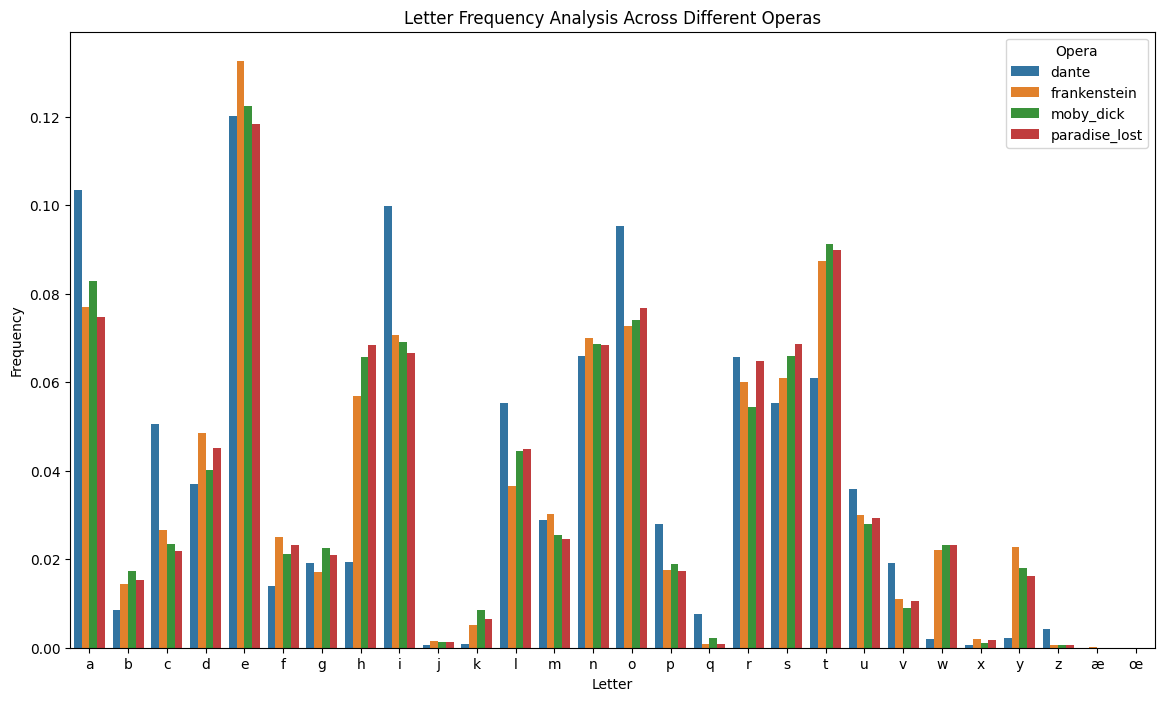

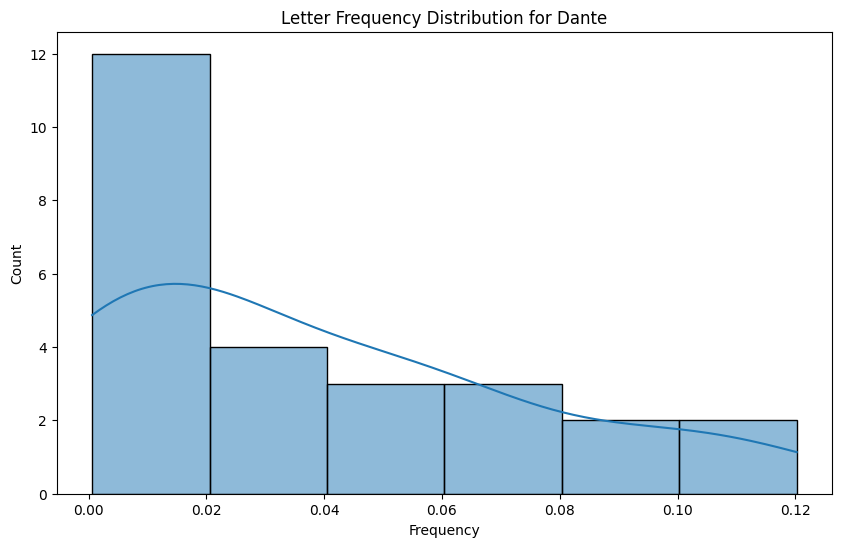

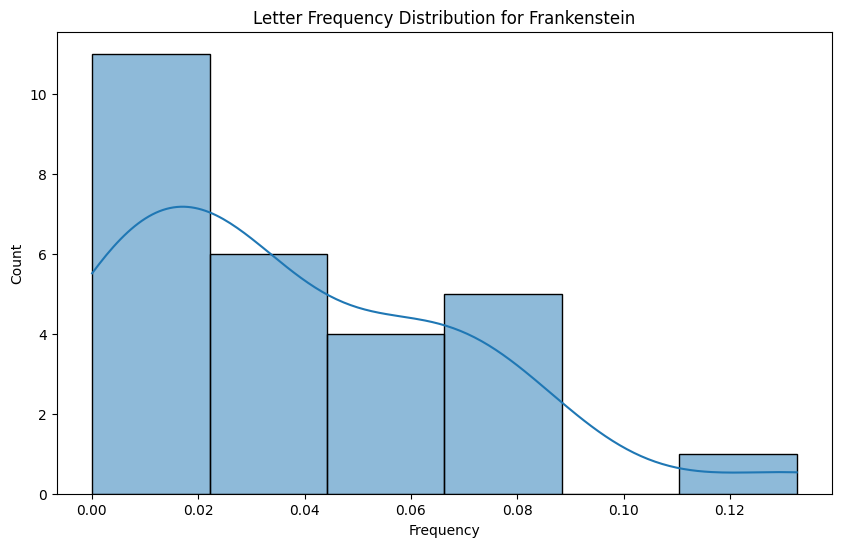

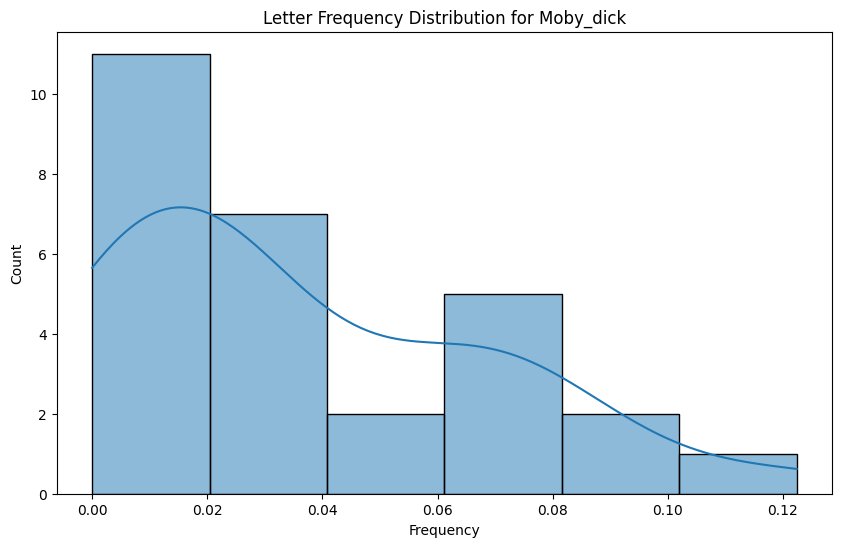

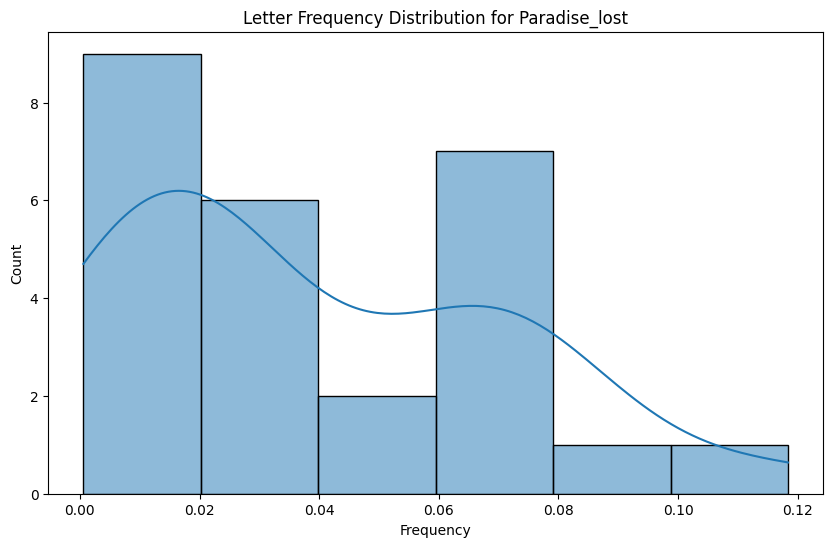

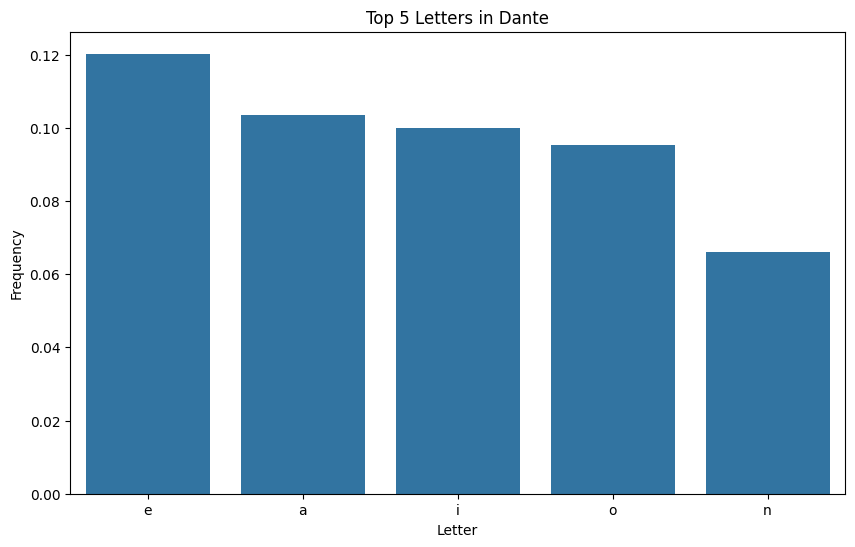

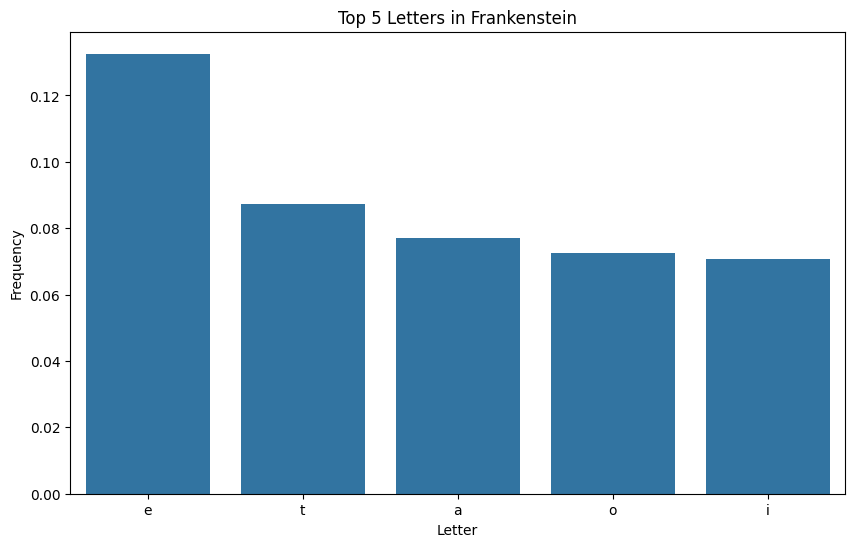

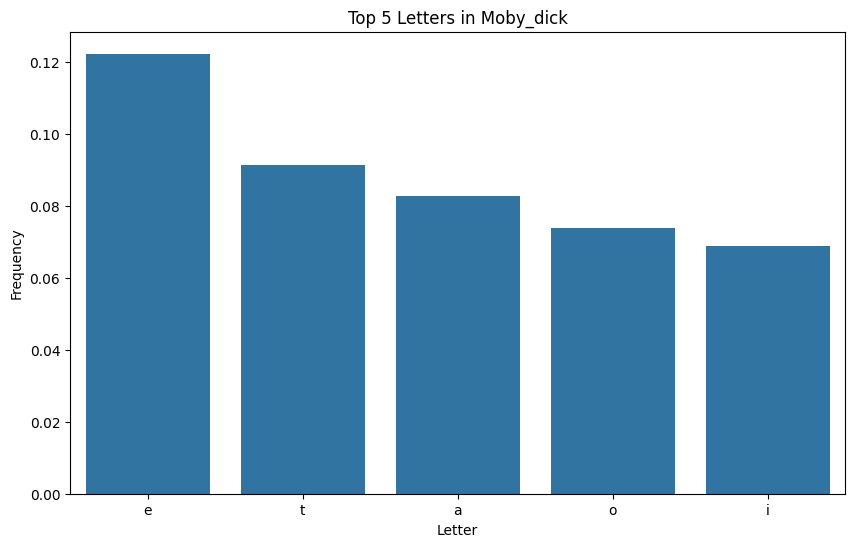

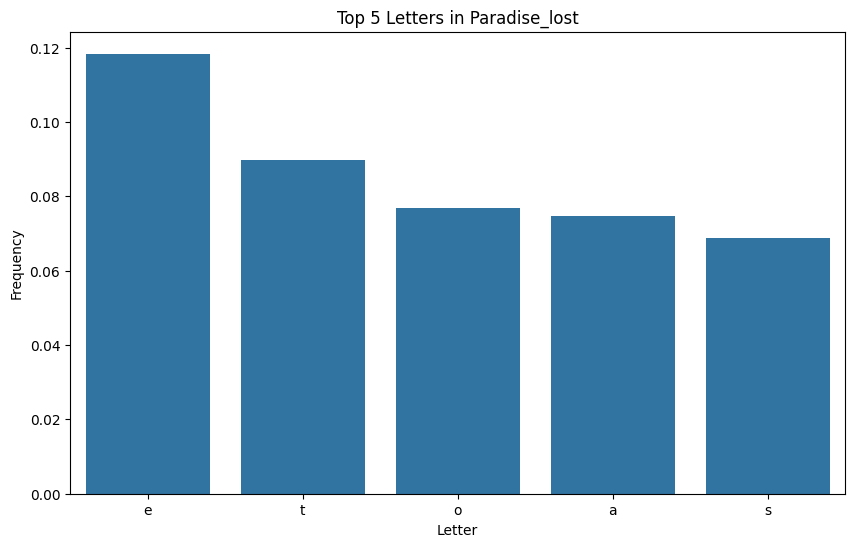

           Dante  Frankenstein  Moby_dick  Paradise_lost
count  26.000000     27.000000  28.000000      26.000000
mean    0.038462      0.037037   0.035714       0.038462
std     0.036055      0.033166   0.032932       0.032412
min     0.000599      0.000060   0.000006       0.000582
25%     0.007747      0.012723   0.008828       0.015544
50%     0.028465      0.026668   0.023393       0.023960
75%     0.059509      0.060450   0.065791       0.067917
max     0.120234      0.132554   0.122390       0.118359


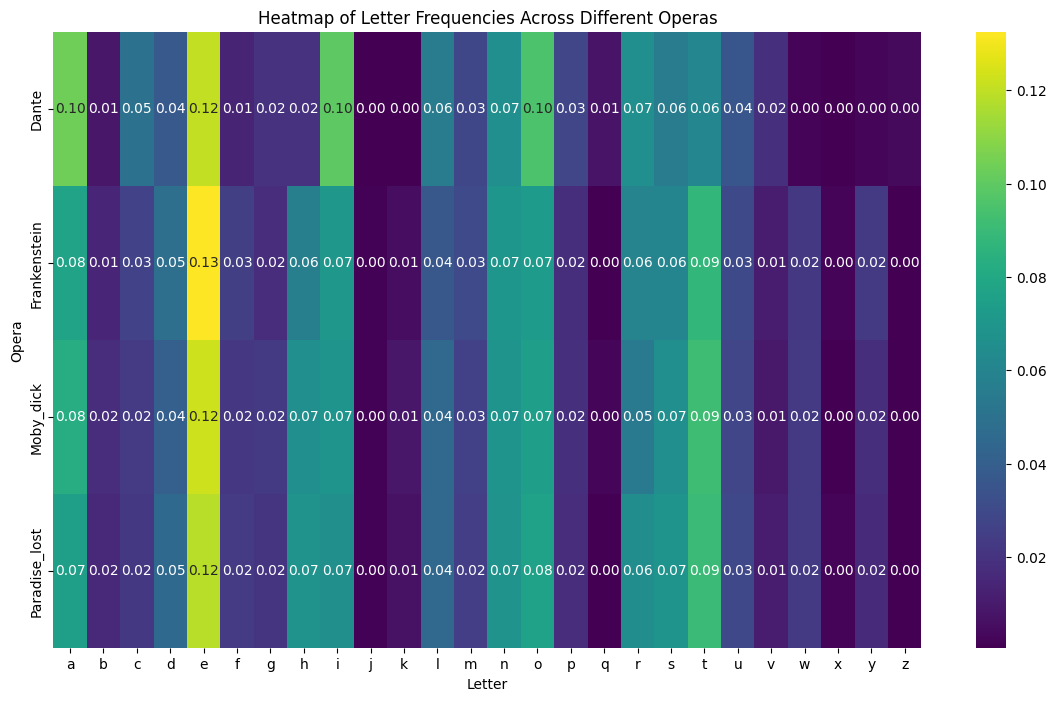

In [93]:
# Define the operas you want to analyze
operas = ['dante', 'frankenstein', 'moby_dick', 'paradise_lost']
# Load the data
data_frames = load_data(operas, 'frequency')
# Plot the data
plot_letter_frequency(data_frames)
# Plot letter frequency distribution
plot_letter_frequency_distribution(data_frames)
# Plot top N letters
plot_top_n_letters(data_frames, n=5)

# Get the summary statistics
summary_stats_df = summary_statistics(data_frames)
# Display the summary statistics
print(summary_stats_df)

# Plot heatmap of letter frequencies
plot_heatmap(data_frames)
